<a href="https://colab.research.google.com/github/Sanjo23Chaval/AML/blob/main/AML_project_Oscar_SanJose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED WINE DATASET**

# 1. Introduction and context


The Red Wine dataset is a dataset available at the UCI Machine Learning Repository [(Link)](https://archive.ics.uci.edu/ml/datasets/wine+quality). Data are obtained from red variants of the Portuguese "Vinho Verde" wine. Specifically this dataset comprises 1599 samples, each associated to 11 input variables (features) based on their physicochemical properties, as well as 1 output variable, the score of the sample, based on sensory data. The input variables are the following:


1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

And the source of this dataset is the following: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009


The aim of this project is to predict the quality of the wine based on the physicochemical properties. We will produce a binary classification based on the quality of the wines. The wines with score 3, 4, 5 will be considered as **BAD**, while the ones with 6, 7 or 8 will be considered as **GOOD**



# 2. Data preparation

*All the libraries imported for the correct development of the project are run here to have a clear organization*

In [20]:
# Libraries imported
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras
from pandas import read_csv, set_option
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


## 2.1 Upload data

We will upload the data from a **GitHub** repository, given that with this method this is reproducible even without having the dataset locally in your PC. For this purpose we will import **Pandas**, a Data Analysis library of Python that we will also use for another purposes.

In [21]:
url = 'https://raw.githubusercontent.com/Sanjo23Chaval/AML/main/winequality-red.csv'
data = pd.read_csv(url, header=0)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Apparently everything went well as we have 1599 rows (samples) and 12 colums (11 features + 1 output variable). Nevertheless we will check this again.

In [22]:
shape = data.shape
shape

(1599, 12)

In [23]:
data_types = data.dtypes
data_types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

With the two previous cells we have realized that our dataset was imported correctly, and we have seen which are the data types present in the dataset. As usual, the values of the chemical properties are float while the quality, a discrete value, is an integer.

## 2.2 Explore data

In order to understand better our dataset, normally a data exploration is recommended. In this way we will be able to observe the distribution of our data, specially important for the data processing, as well as important relations among the variables that are present in the dataset.

In [24]:
set_option('display.width', 200)
set_option('display.max_rows', 13)
set_option('display.max_columns', 40)
set_option('precision', 10)    

In [25]:
description = data.describe()
print(description)

         fixed acidity  volatile acidity      citric acid   residual sugar        chlorides  free sulfur dioxide  total sulfur dioxide          density               pH        sulphates  \
count  1599.0000000000   1599.0000000000  1599.0000000000  1599.0000000000  1599.0000000000      1599.0000000000       1599.0000000000  1599.0000000000  1599.0000000000  1599.0000000000   
mean      8.3196372733      0.5278205128     0.2709756098     2.5388055034     0.0874665416        15.8749218261         46.4677923702     0.9967466792     3.3111131957     0.6581488430   
std       1.7410963181      0.1790597042     0.1948011374     1.4099280595     0.0470653020        10.4601569698         32.8953244783     0.0018873340     0.1543864649     0.1695069796   
min       4.6000000000      0.1200000000     0.0000000000     0.9000000000     0.0120000000         1.0000000000          6.0000000000     0.9900700000     2.7400000000     0.3300000000   
25%       7.1000000000      0.3900000000     0.09000000

Thanks to this command we can observe interesting statistics of the input variables and the output variable. We have retrieved, for each column: the number of samples associated (count), the mean, the standard deviation, the minimum and the maximum values, and the interquartile range. One of the most interesting results is the fact that the minimum of the quality is 3 while its maximum is 8. This means that we do not have "horrible" wines (0,1 or 2 scores) or "excellent" wines (9, 10 scores). This actually makes sense given that, as we commented before, the quality has been established sensorially. It is very difficult and, probably, pretentious, to assign a wine a perfect score. Assigning a very poor score to a wine is the other way around, not pretentious but somehow "cruel". Actually, one of the reasons because there are no lower than 3-scored wines could be due to the fact that those wines are not even analysed.



In [26]:
data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

Here we can observe which is the distribution of the quality score. It is quite evident that the **distribution** is totally **irregular**, having few 3, 4, 7 and 8 score wines, while the 5 and 6 score wines represent the majority of the dataset. We will show a graphical representation of this in the next cells.

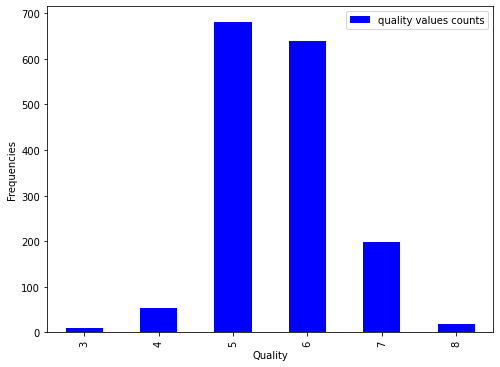

In [27]:
qualities = data["quality"].value_counts().sort_index()
qualities = qualities.to_frame(name="quality values counts")
qualities.plot.bar(color=['blue'],figsize=[8,6])
plt.xlabel("Quality")
plt.ylabel("Frequencies")
plt.show()

We can plot density plots for all the features of the dataset in order to see the distribution of their values. This allow us to understand how features are organised and which are the most common values, for example.

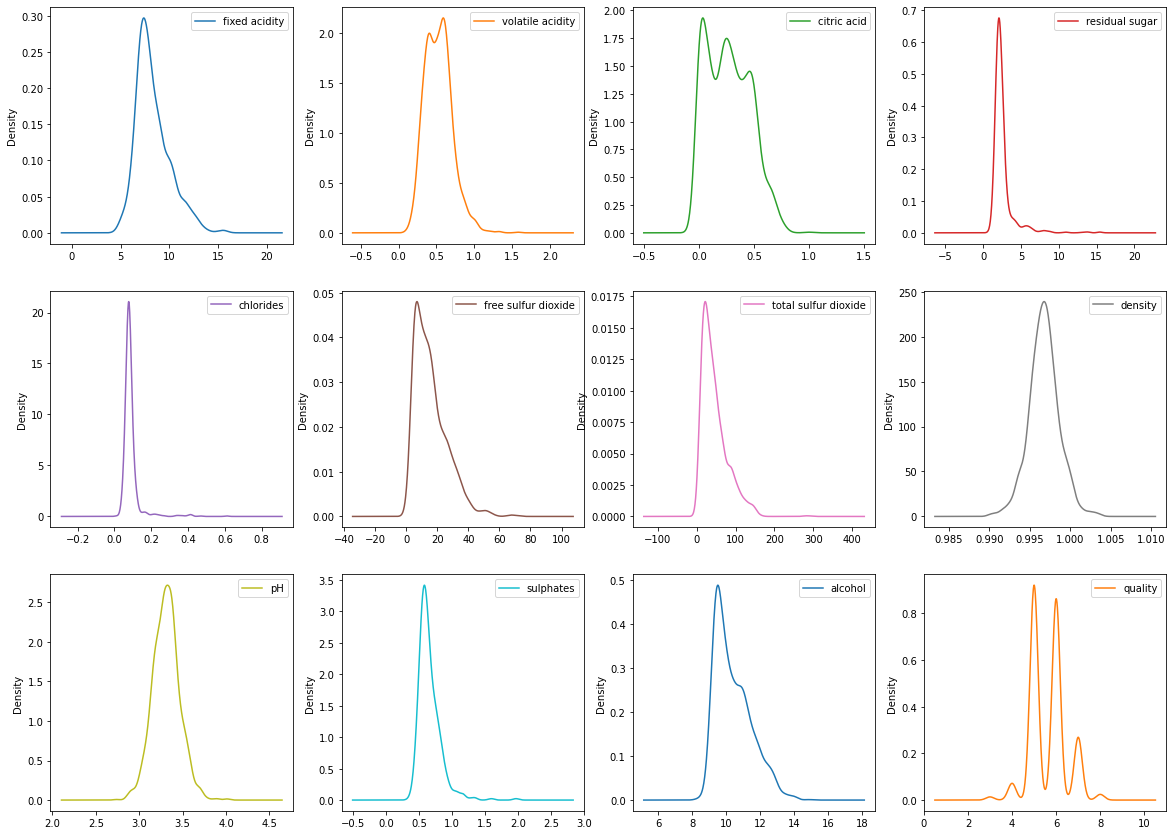

In [28]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20])
plt.show()

We can observe that forsome features the distribution is not normal at all, for example the citric acid distribution shows peaks in certain values. Nevertheless features like the pH or the density follow a normal distribution.

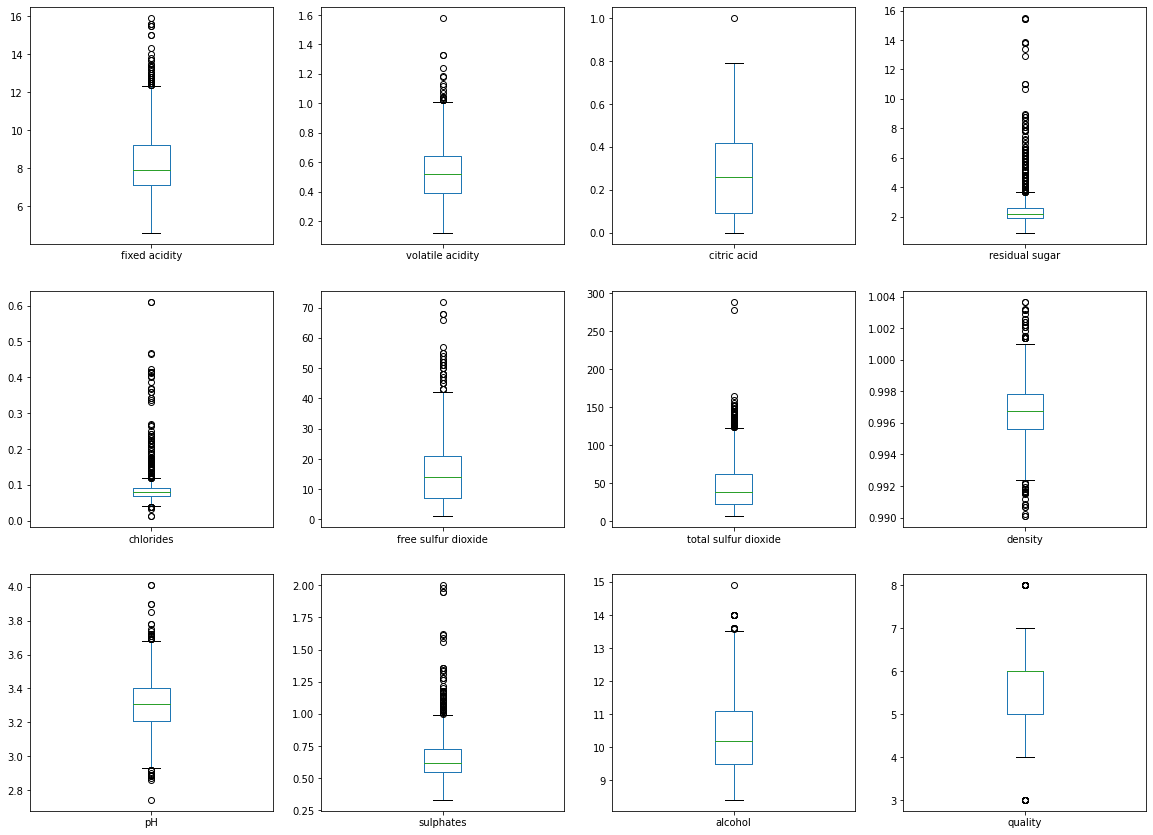

In [29]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20])
pyplot.show()

The box-plot allow us to confirm the presence of many **outliers** im the dataset, specially in some features such as chlorides, sulphates or residual sugar. Although this problem can be overcome in some way with a standardization process, the presence of so many outliers can make achieving good performances difficult.

Another very interesting plot that we may produce before getting into the training of the model is a **correlation matrix**, that may allow us to understand how variables are correlated among them as well as the correlations between the features and the score. The latter may be extremely important in the case of feature selection or regularization, in order to avoid overfitting. Nevertheless we will discuss that later on if it would be required. For the moment lets observe the correlation matrix and extract some conclusions. It is important to point out that the correlation used is the **Pearson** correlation.



In [30]:
correlations = data.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000000000,-0.2561308948,0.6717034348,0.1147767245,0.0937051863,-0.1537941929,-0.1131814430,0.6680472921,-0.6829781946,0.1830056639,-0.0616682706,0.1240516491
volatile acidity,-0.2561308948,1.0000000000,-0.5524956846,0.0019178820,0.0612977725,-0.0105038270,0.0764700048,0.0220262322,0.2349372944,-0.2609866853,-0.2022880272,-0.3905577803
citric acid,0.6717034348,-0.5524956846,1.0000000000,0.1435771616,0.2038229138,-0.0609781292,0.0355330239,0.3649471752,-0.5419041447,0.3127700439,0.1099032466,0.2263725143
residual sugar,0.1147767245,0.0019178820,0.1435771616,1.0000000000,0.0556095352,0.1870489951,0.2030278817,0.3552833710,-0.0856524222,0.0055271213,0.0420754372,0.0137316373
chlorides,0.0937051863,0.0612977725,0.2038229138,0.0556095352,1.0000000000,0.0055621470,0.0474004683,0.2006323266,-0.2650261312,0.3712604813,-0.2211405448,-0.1289065599
free sulfur dioxide,-0.1537941929,-0.0105038270,-0.0609781292,0.1870489951,0.0055621470,1.0000000000,0.6676664505,-0.0219458312,0.0703774985,0.0516575718,-0.0694083536,-0.0506560572
total sulfur dioxide,-0.1131814430,0.0764700048,0.0355330239,0.2030278817,0.0474004683,0.6676664505,1.0000000000,0.0712694762,-0.0664945590,0.0429468362,-0.2056539437,-0.1851002889
density,0.6680472921,0.0220262322,0.3649471752,0.3552833710,0.2006323266,-0.0219458312,0.0712694762,1.0000000000,-0.3416993348,0.1485064117,-0.4961797702,-0.1749192278
pH,-0.6829781946,0.2349372944,-0.5419041447,-0.0856524222,-0.2650261312,0.0703774985,-0.0664945590,-0.3416993348,1.0000000000,-0.1966476023,0.2056325085,-0.0577313912
sulphates,0.1830056639,-0.2609866853,0.3127700439,0.0055271213,0.3712604813,0.0516575718,0.0429468362,0.1485064117,-0.1966476023,1.0000000000,0.0935947504,0.2513970791


Lets plot the correlation matrix using a **heatmap**. We will use the **Seaborn** library because it allows easily this plot. Actually, we will plot only the **lower triangle** of the matrix, without including the diagonal, mainly because the matrix is symmetric. Due to that property, the upper and lower triangle offer exactly the same information, so both triangles are redundant. In this way we simplify the visualization and make it cleaner. Furthermore, the non inclusion of the diagonal is due to the fact that all the diagonal values will be always 1.

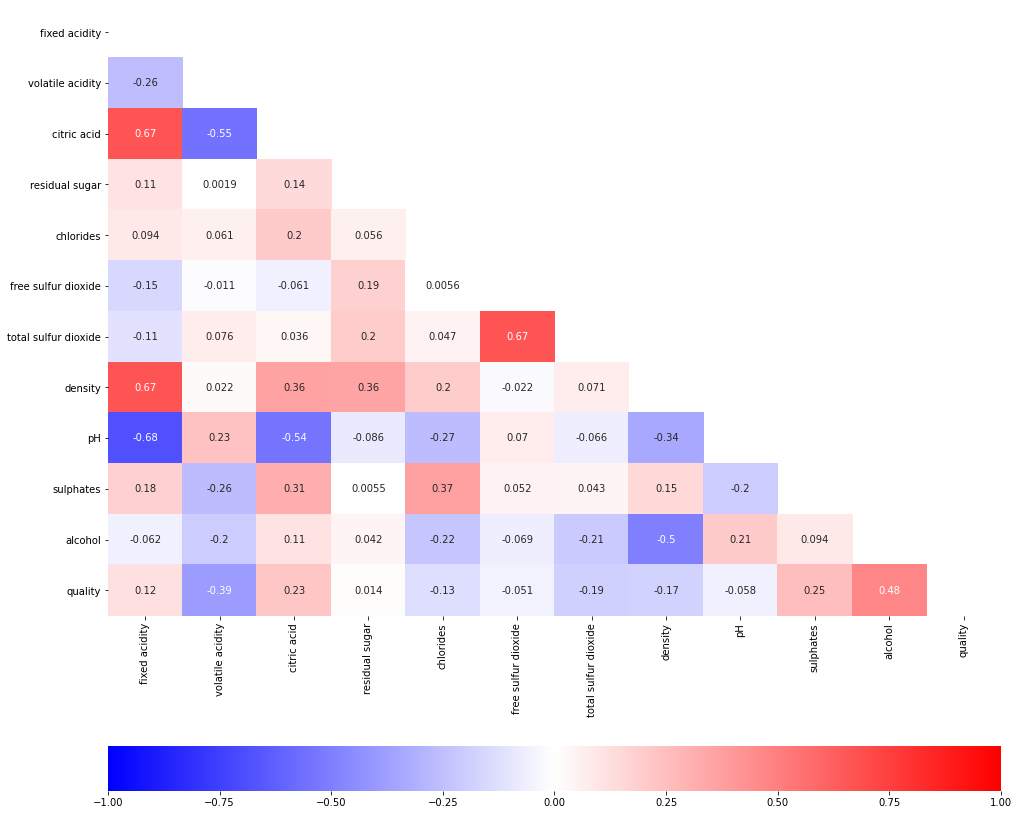

In [31]:
tri_corr = np.triu(correlations)
plt.figure(figsize=(16,16))
sns.heatmap(correlations,annot=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap = "bwr",cbar_kws= {'orientation': 'horizontal'}, mask = tri_corr)
plt.show()

Visualizing this heatmap we observe expected correlations. For example, citric acid is correlated with the fixed acidity, as well as negatively correlated with pH (as we know, the lower the pH the more acid the wine). If we observe the correlation between the quality and the features, we observe two interesting correlations: the volatile acidity is negatively correlated while the alcohol is positively correlated. This could be a hint about which features are more important for the model to discriminate between a good and a bad wine. 
The fact that the volatile acidity is negatively correlated with the quality makes sense, given that this volatile acidity is a property that contributes to the wines to taste like vinegar.

## 2.3 Preparation of the data

The first task to do is splitting the data into the two classes aforementioned: **BAD** (labelled as 0) and **GOOD** (labelled as 1)

In [32]:
classes = []
for i in data["quality"]:
  if i<=5:
    classes.append(0)
  else:
    classes.append(1)
data["classes"] = classes

Now we are going to observe that the classes are well balanced, otherwise we should face the impaired datasets problems, nicely explained in this [link](https://www.jeremyjordan.me/imbalanced-data/).

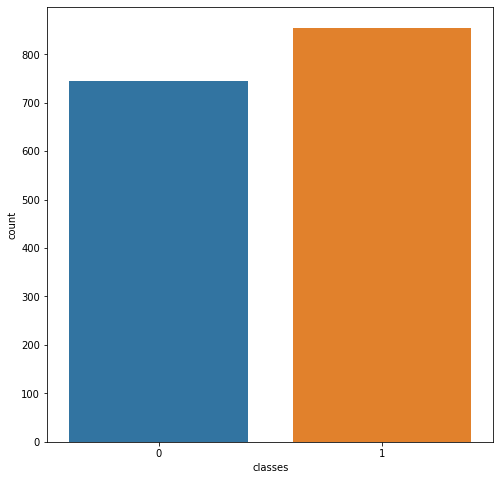

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['classes'])
plt.show()

Seems that the dataset is balanced. Of course the dataset is slightly balanced to the **GOOD** class, but that balance will not cause any problem.

Now we need to split our data. On the one hand we have the features, that are the variables that would define the quality level of our wine. These are the **input variables**. On the other hand we have the three classes indicated previously, that are the **labels, classes or response variables**.

In [34]:
X = data.drop(["quality","classes"],axis = 1)
Y = data['classes']

We need to **standardize** the data, because the range of values between the variables is too wide. Not standardizing would lead to a very low influece of the variables that have small values, and at the same time, an overvaluation of the variables with the biggest values.
With standardization, the values are centered around the mean with a unit standard deviation. Therefore, the mean of the feature becomes zero and the resultant distribution has a unit standard deviation.

$x_{new}=\frac{x-\mu}{\sigma}$

The previous image shows the formula for standardization, where $x_{new}$ is the value after standardization, $x$ is the original value, $\mu$ is the mean, and $\sigma$ is the standard deviation

Nevertheless, is very important to point out that before applying the standardization we must **split the data into the training and testing set**. Why doing this? A very good explanation can be found in this [link](https://medium.com/analytics-vidhya/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b). Citing from the webpage: *mean and standard deviation is taken into account when standardising our data. If we take the mean and variance of the whole dataset then we will be introducing future information into the training explanatory variables. Therefore, we should perform feature scaling over the training data and then perform normalisation on testing instances as well, but this time using the mean and standard deviation of training explanatory variables. In this way, we can test and evaluate whether our model can generalise well to new, unseen data points.* (it is important to clarify that although the article talks about normalization, the same logic can be applied to standardization)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
data['classes'].value_counts()

1    855
0    744
Name: classes, dtype: int64

This finishes the preparation of the data, so we can start with the training. Actually more data manipulation could be required to improve the models, although we will discuss those possibilities, if needed, in the following sections.

# 3. Developing the models

*Before entering into the analysis we are going to define a function that will be useful in the following steps in order to automatically plot confussion matrices*

In [38]:
def plot_cm(cm):
  group_names = ['True BAD','False GOOD','False BAD','True GOOD']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, fmt='', cmap = "Blues", annot=labels)
  plt.xlabel("Predicted values")
  plt.ylabel("Actual values")
  plt.show()

## 3.1 Logistic regression

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, Y_train) 
Y_test_pred = LR.predict(X_test)
LR_report = classification_report(Y_test,Y_test_pred)
LR_cm = confusion_matrix(Y_test, Y_test_pred)
print(LR_report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       213
           1       0.78      0.73      0.76       267

    accuracy                           0.74       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.74      0.74       480



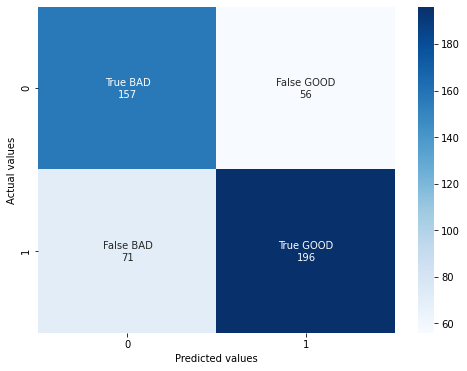

In [ ]:
plot_cm(LR_cm)

Now we will perform **Cross-Validation** (CV) with the model generated to see if the performance is consistent. A high standard deviation after the CV would indicate that the predictions could be obtained by chance.

In [ ]:
all_acc_LR = cross_val_score(estimator=LR, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_LR.mean())
print('CV_StandardDev: ', all_acc_LR.std())

CV_accuracy:  0.7551480051480051
CV_StandardDev:  0.05961408117124478


Our model has a good performance, with 75% mean accuracy after CV and a very low standard deviation of the CV . We should try to improve the model with a **Grid Search**. This a procedure in which, summarizing, we try different hyperparameters for the algorithm in order to choose the one that maximizes the performance of the model. In the Logistic regression, we will tune the hyperparameter C.

In [ ]:
grid={"C":[0.001,0.01,0.1,1,10,100,1000]}
LR_CV=GridSearchCV(LR,grid,cv=10, scoring="accuracy")
LR_CV.fit(X_train,Y_train)
print("Best parameters ",LR_CV.best_params_)
print("Accuracy :",LR_CV.best_score_)

Best parameters  {'C': 1}
Accuracy : 0.7551480051480051


The grid search resulted in similar accuracy as the C parameter is the similar to the one that is run in default mode.

## 3.2 Classification tree

In [ ]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train,Y_train)
Y_test_pred = DT.predict(X_test)
DT_report = classification_report(Y_test,Y_test_pred)
DT_cm = confusion_matrix(Y_test,Y_test_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       213
           1       0.78      0.81      0.79       267

    accuracy                           0.77       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.77      0.77       480



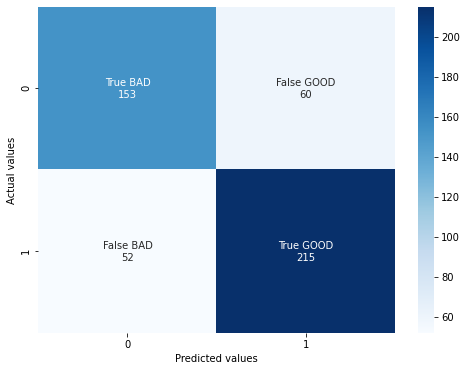

In [ ]:
plot_cm(DT_cm)

In [ ]:
all_acc_DT = cross_val_score(estimator=DT, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_DT.mean())
print('CV_StandardDev: ', all_acc_DT.std())

CV_accuracy:  0.7310408622908622
CV_StandardDev:  0.03735395224912305


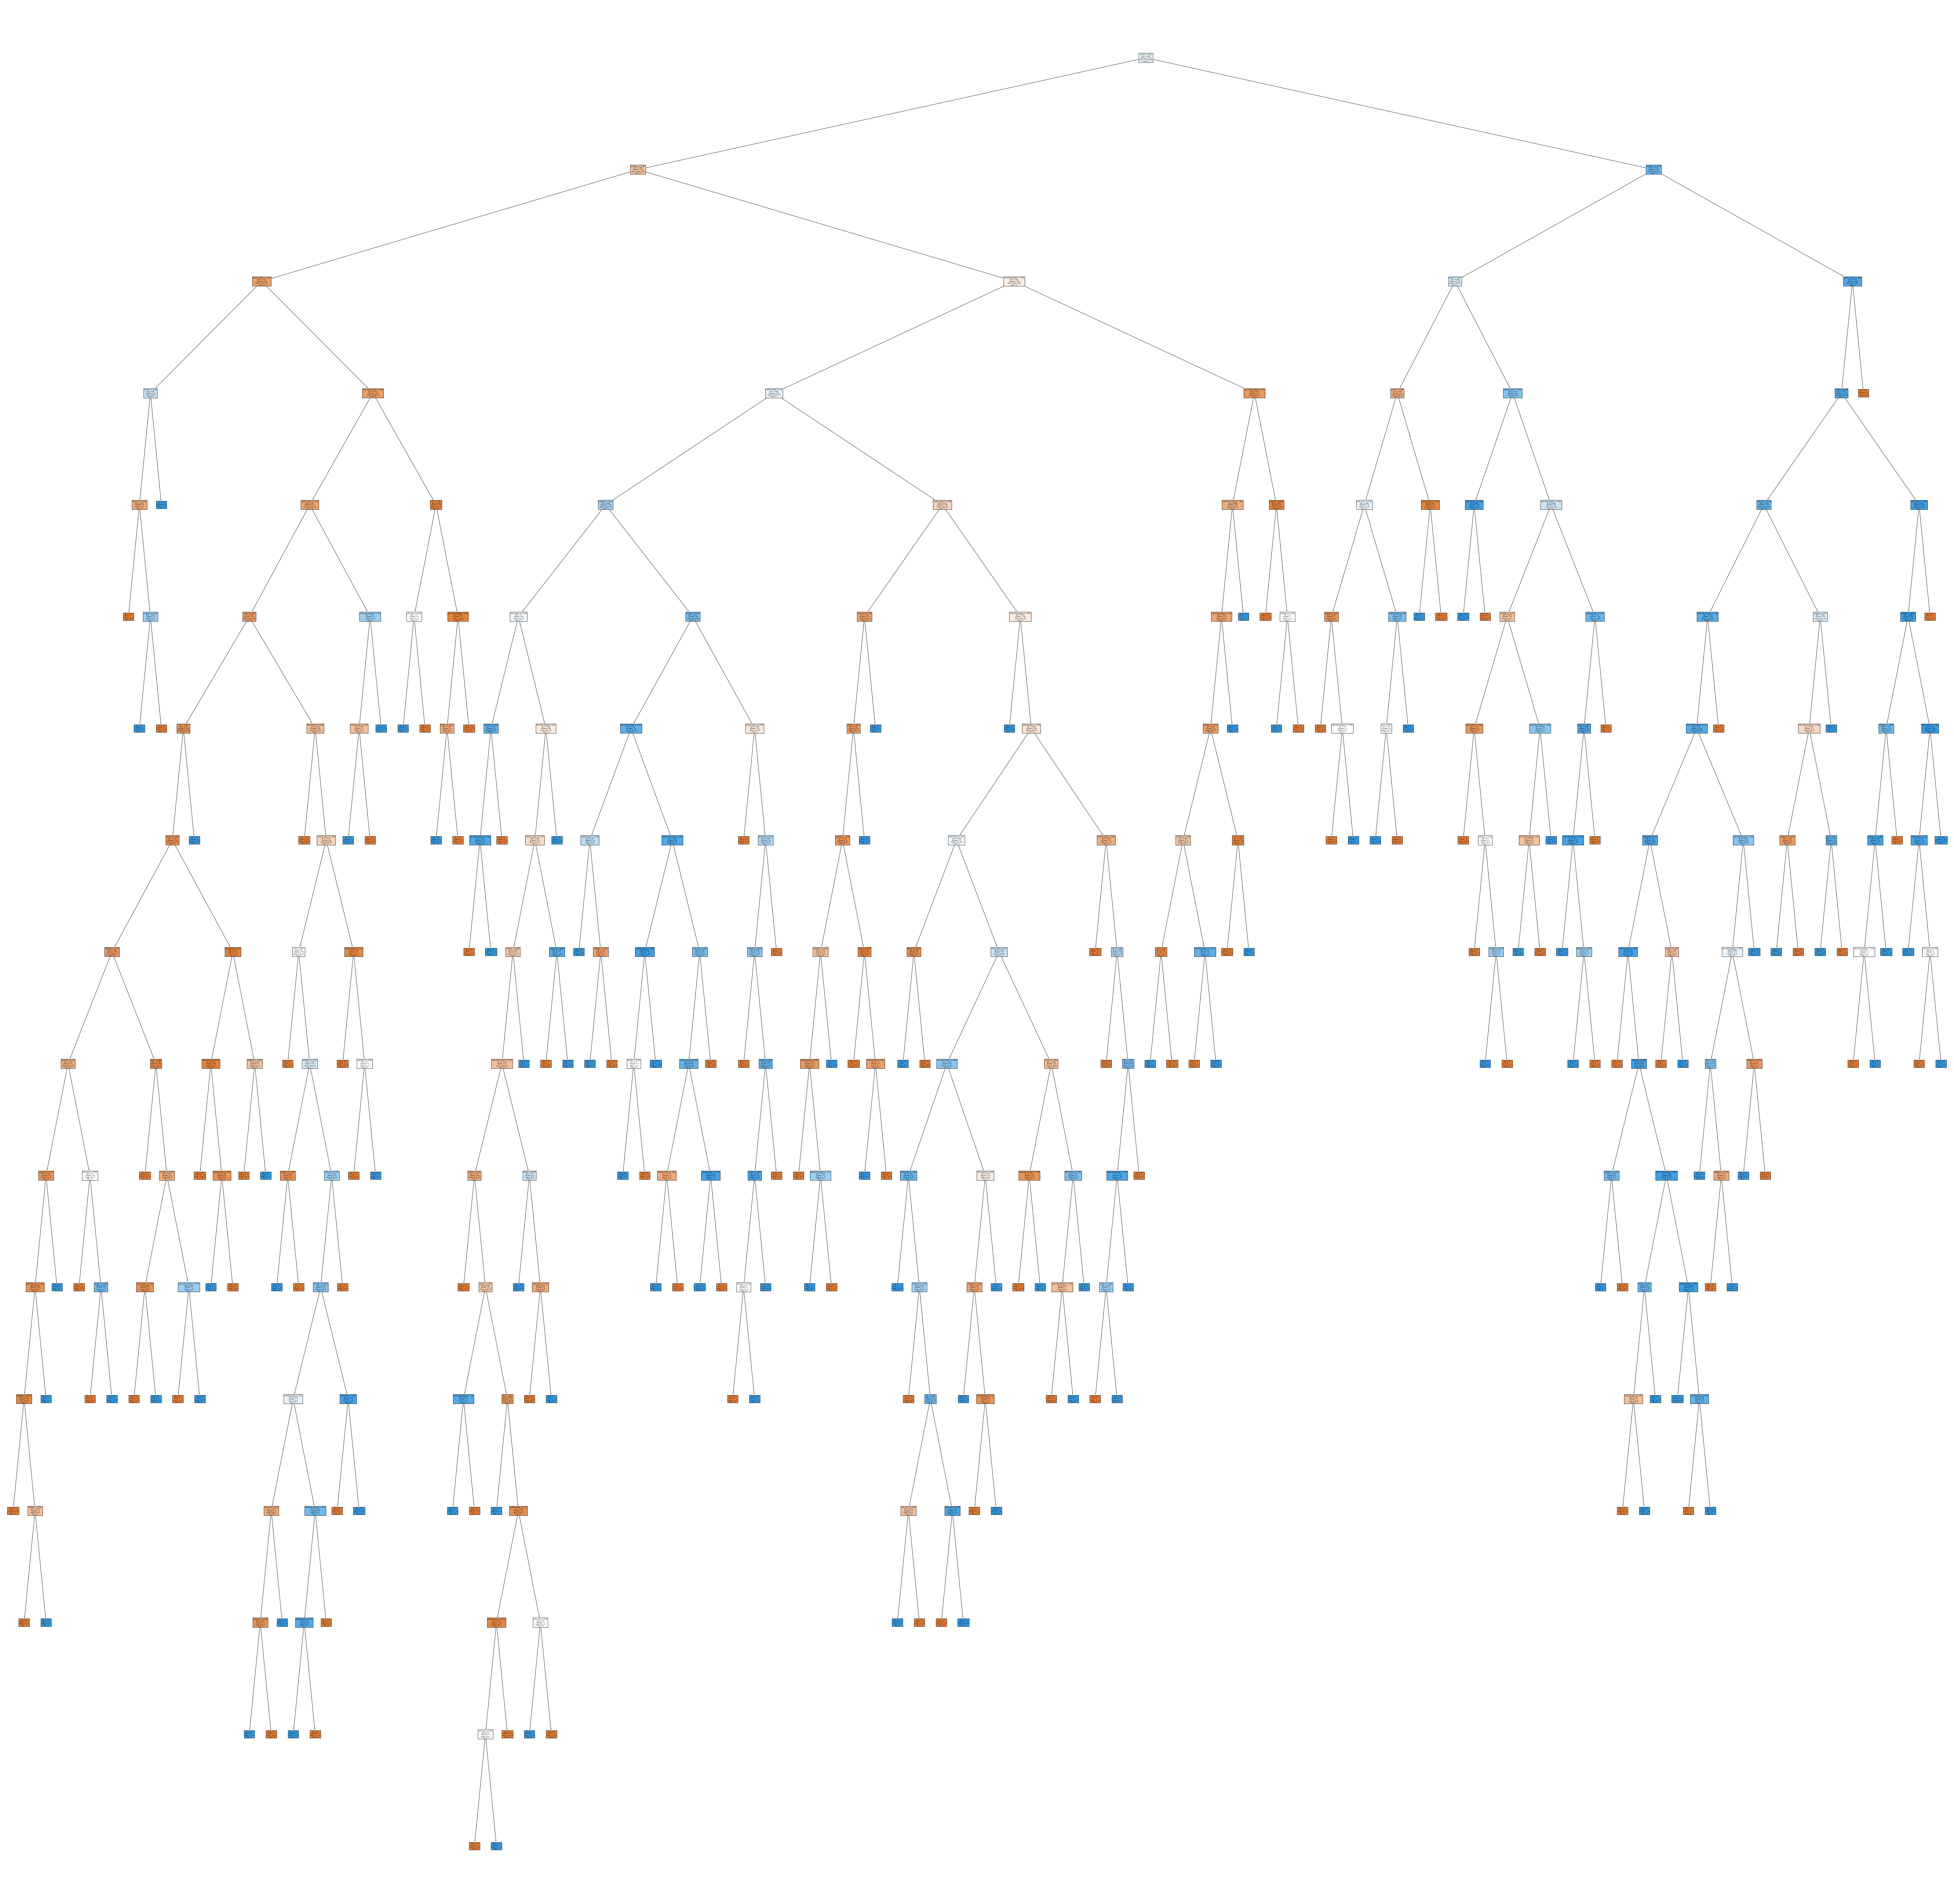

In [ ]:
features = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]
class_name = ["0","1"]
plt.figure(figsize=(120,120))
_ = plot_tree(DT, feature_names=features,  class_names=class_name, filled=True)

With this algorithm we have been able to obtain similar accuracies with respect to the Logistic Regression model (73 % accuracy for Trees vs 75 % accuracy for Regression).

In [ ]:
DT_parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12,14],'max_leaf_nodes': list(range(2, 6)), 'min_samples_split': [2, 3, 4]}
DT_CV = GridSearchCV(DT, DT_parameters, cv=10)
DT_CV.fit(X_train,Y_train)
print("Best parameters ",DT_CV.best_params_)
print("Accuracy :",DT_CV.best_score_)

Best parameters  {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Accuracy : 0.7042310167310168


In [ ]:
DT_tunned = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, max_leaf_nodes = 2, min_samples_split = 2, random_state=42)
DT_tunned.fit(X_train,Y_train)
Y_test_pred_tunned = DT_tunned.predict(X_test)
DT_report_tunned = classification_report(Y_test,Y_test_pred_tunned)
DT_cm_tunned = confusion_matrix(Y_test,Y_test_pred_tunned)
print(DT_report_tunned)

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       213
           1       0.77      0.55      0.64       267

    accuracy                           0.66       480
   macro avg       0.68      0.67      0.66       480
weighted avg       0.69      0.66      0.66       480



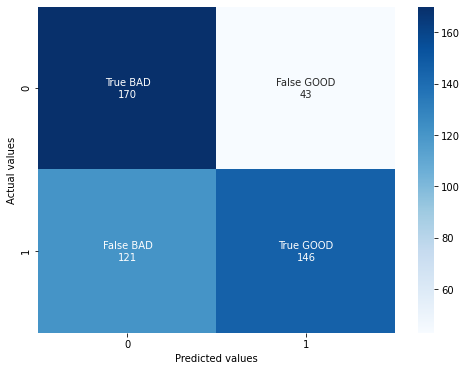

In [ ]:
plot_cm(DT_cm_tunned)

In [ ]:
all_acc = cross_val_score(estimator=DT_tunned, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc.mean())
print('CV_StandardDev: ', all_acc.std())

CV_accuracy:  0.7042310167310168
CV_StandardDev:  0.04977781383944863


In this case the Grid Search resulted in a lower accuracy than the original run for the model. This is probably caused by the fact that our grid search did not include all the possible parameters, given that this is very time consuming.

## 3.3 Support Vector Machines

### 3.3.1 Linear SVM

In [ ]:
SV = SVC(kernel = 'linear', random_state = 42, max_iter=500000)
SV.fit(X_train, Y_train)
Y_test_pred = SV.predict(X_test)
SV_report = classification_report(Y_test,Y_test_pred)
SV_cm = confusion_matrix(Y_test,Y_test_pred)
print(SV_report)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       213
           1       0.79      0.70      0.74       267

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



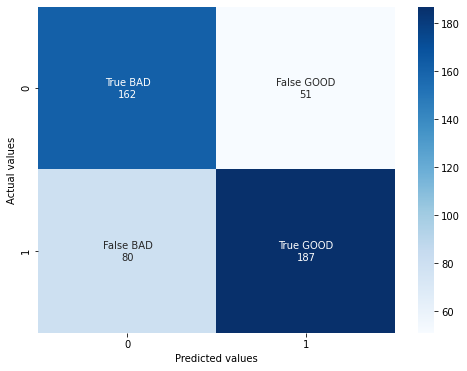

In [ ]:
plot_cm(SV_cm)

In [ ]:
all_acc = cross_val_score(estimator=SV, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc.mean())
print('CV_StandardDev: ', all_acc.std())

CV_accuracy:  0.741755148005148
CV_StandardDev:  0.053837939789374824


The accuracy is similar to the ones that we obtained using the Logistic Regression and Decision Trees. We will perform again a grid search in order to tune the hyperparameters and improve the model

In [ ]:
#DONT RE-RUN THIS CELL
SV_parameters = {'C':[0.1, 1,10,100,1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} #Do not run again this cell
SV_CV = GridSearchCV(SV, SV_parameters, cv=10)
SV_CV.fit(X_train,Y_train)
print("Best parameters ",SV_CV.best_params_)
print("Accuracy :",SV_CV.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklea

Best parameters  {'C': 0.1, 'gamma': 1}
Accuracy : 0.7435408622908622


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
SV_tunned = SVC(kernel = 'linear', random_state = 42, max_iter=500000, C =0.1, gamma=1)
SV_tunned.fit(X_train, Y_train)
Y_test_pred = SV_tunned.predict(X_test)
SV_report_tunned = classification_report(Y_test,Y_test_pred)
SV_cm_tunned = confusion_matrix(Y_test,Y_test_pred)
print(SV_report_tunned)

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       213
           1       0.79      0.70      0.74       267

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.73      0.73       480



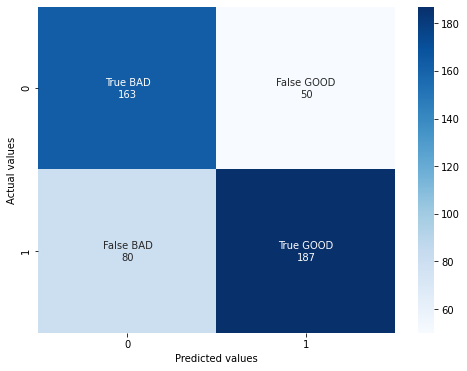

In [ ]:
plot_cm(SV_cm_tunned)

In [ ]:
all_acc_LSVM = cross_val_score(estimator=SV_tunned, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_LSVM.mean())
print('CV_StandardDev: ', all_acc_LSVM.std())

CV_accuracy:  0.7435408622908622
CV_StandardDev:  0.05553575119457702


The parameters tuning shows no improvement of the model. Now we will try non-linear SVMs. This may allow us to obtain a better model given that we will go from a linear separation to a non-linear separation.

### 3.3.2 Non-linear SVM

In [ ]:
SV_nonlinear = SVC(kernel = 'poly', degree =3, random_state = 42)
SV_nonlinear.fit(X_train, Y_train)
Y_test_pred = SV_nonlinear.predict(X_test)
SV_nonlinear_report = classification_report(Y_test,Y_test_pred)
SV_nonlinear_cm = confusion_matrix(Y_test,Y_test_pred)
print(SV_nonlinear_report)

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       213
           1       0.79      0.75      0.77       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [ ]:
all_acc = cross_val_score(estimator=SV_nonlinear, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc.mean())
print('CV_StandardDev: ', all_acc.std())

CV_accuracy:  0.7506837194337194
CV_StandardDev:  0.048417173073482124


The performance is very similar to the one obtained with the linear SVM, although a bit better. We will therefore try to tune the parameteres with a grid search

In [ ]:
SV_nonlinear_parameters = {'C':np.arange(0.01,1, 0.05), 'degree':[3,4,5]}
SV_nonlinear_CV = GridSearchCV(SV_nonlinear, SV_nonlinear_parameters, cv=10, scoring="accuracy")
SV_nonlinear_CV.fit(X_train,Y_train)
print("Best parameters ",SV_nonlinear_CV.best_params_)
print("Accuracy :",SV_nonlinear_CV.best_score_)                                                                                           

Best parameters  {'C': 0.8600000000000001, 'degree': 3}
Accuracy : 0.751592664092664


In [ ]:
SV_nonlinear_tunned = SVC(kernel = 'poly', C=0.86, degree=3, random_state = 42)
SV_nonlinear_tunned.fit(X_train, Y_train)
Y_test_pred = SV_nonlinear_tunned.predict(X_test)
SV_report_nonlinear_tunned = classification_report(Y_test,Y_test_pred)
SV_cm_nonlinear_tunned = confusion_matrix(Y_test,Y_test_pred)
print(SV_report_nonlinear_tunned)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       213
           1       0.79      0.75      0.77       267

    accuracy                           0.75       480
   macro avg       0.74      0.75      0.74       480
weighted avg       0.75      0.75      0.75       480



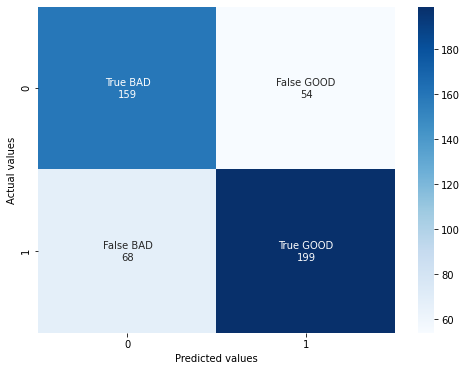

In [ ]:
plot_cm(SV_cm_nonlinear_tunned)

In [ ]:
all_acc = cross_val_score(estimator=SV_nonlinear_tunned, X=X_train, y=Y_train, cv=10)
print(all_acc.mean())
print(all_acc.std())

0.751592664092664
0.0501908690497282


The parameter tuning is not improving too much the performance. Lastly we will try using the rbf kernel in order to see if there is improvement with respect to the polynomial kernel.

In [ ]:
SV_nonlinear_rbf = SVC(kernel = 'rbf', random_state = 42)
SV_nonlinear_rbf.fit(X_train, Y_train)
Y_test_pred = SV_nonlinear_rbf.predict(X_test)
SV_report_rbf = classification_report(Y_test,Y_test_pred)
SV_cm_rbf = confusion_matrix(Y_test,Y_test_pred)
print(SV_report_rbf)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       213
           1       0.80      0.73      0.76       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



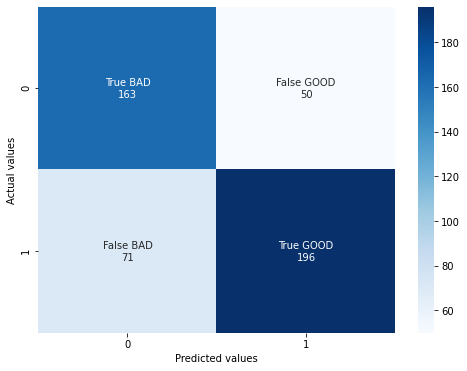

In [ ]:
plot_cm(SV_cm_rbf)

In [ ]:
all_acc = cross_val_score(estimator=SV_nonlinear_rbf, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc.mean())
print('CV_StandardDev: ', all_acc.std())

CV_accuracy:  0.764132882882883
CV_StandardDev:  0.055464544162159075


Seems that the accuracy has been slightly improved. We will try to perform grid search on this model as well to see if we observe improvements

In [ ]:
SV_nonlinear__rbf_parameters = {'C':[0.01,0.1,1,10,100]}
SV_nonlinear_rbf_CV = GridSearchCV(SV_nonlinear_rbf, SV_nonlinear__rbf_parameters, cv=10, scoring="accuracy")
SV_nonlinear_rbf_CV.fit(X_train,Y_train)
print("Best parameters ",SV_nonlinear_rbf_CV.best_params_)
print("Accuracy :",SV_nonlinear_rbf_CV.best_score_)            

Best parameters  {'C': 10}
Accuracy : 0.769449806949807


In [ ]:
SV_nonlinear_rbf_tunned = SVC(kernel = 'rbf', C = 10, random_state = 42)
SV_nonlinear_rbf_tunned.fit(X_train, Y_train)
Y_test_pred = SV_nonlinear_rbf_tunned.predict(X_test)
SV_report_rbf = classification_report(Y_test,Y_test_pred)
SV_cm_rbf = confusion_matrix(Y_test,Y_test_pred)
print(SV_report_rbf)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       213
           1       0.80      0.76      0.78       267

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



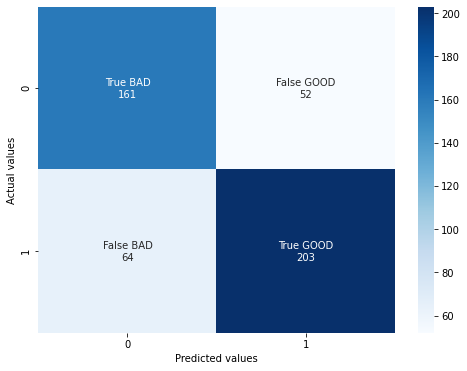

In [ ]:
plot_cm(SV_cm_rbf)

In [ ]:
all_acc_NLSVM = cross_val_score(estimator=SV_nonlinear_rbf_tunned, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_NLSVM.mean())
print('CV_StandardDev: ', all_acc_NLSVM.std())

CV_accuracy:  0.769449806949807
CV_StandardDev:  0.045075023922757106


There is slight improvement with the rbf kernel, achieving an accuracy of almost 77%.

## 3.4 Random Forests

In [ ]:
RF = RandomForestClassifier(n_estimators =300, random_state=42)
RF.fit(X_train, Y_train)
Y_test_pred = RF.predict(X_test)
RF_report = classification_report(Y_test,Y_test_pred)
RF_cm = confusion_matrix(Y_test,Y_test_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       213
           1       0.82      0.82      0.82       267

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



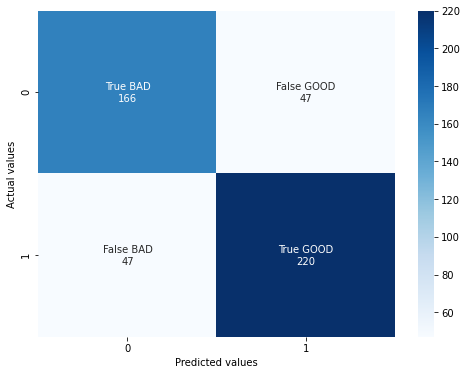

In [ ]:
plot_cm(RF_cm)

In [ ]:
all_acc_RF = cross_val_score(estimator=RF, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_RF.mean())
print('CV_StandardDev: ', all_acc_RF.std())

CV_accuracy:  0.8052284427284426
CV_StandardDev:  0.03932086776523559


Here we can observe that **Random Forests** are, until now, the only method able to achieve an accuracy higher than 80%. Why is this happening? Mainly because Random Forests are **Ensembles**. This means that Random Forests act as a group of predictors (a huge number of DTs, in our case 300). With this approach we increase the performance of the model mainly because we have many "experts" judging the dataset. This is the reason why Random Forests give the best performance until now.

We could try to improve the model tuning the hyperparameters. Nevertheless this procedure for Random Forests is not as useful as in other techniques as the power of this algorithm relies on the number of estimators. So applying the default parameters is good enough.

## 3.5 Ensembles

Given the power that the Random Forest algorithm have shown, the last model that we will develop will be an Ensemble. The aim is to outperform the performance of each classifier combining them into an Ensemble. The Ensemble will be tested with both **hard** and **soft** voting. The main difference between the two approaches is that the **hard** voting aggregates the predictions of each classifier and then predicts for each instance the most voted class, while the **soft** voting approach predicts the class with the highest class probability, averaged over all the individual classifiers.

For the **hard** voting, we will generate the ensembler using as individual classifiers **Random Forest**, **Non-linear SVM** with the rbf kernel and **Logistic Regression**. We will use the previous obtained models.

For the **soft** voting, We will produce the ensembler using as individual classifiers **Random Forest** and **Logistic Regression**. We will not use the SVM because this classifier is not based on probabilities, so it cannot be used.

### 3.5.1 Hard voting

In [ ]:
ensemble = VotingClassifier(estimators=[('lr', LR), ('rf', RF), ('svc', SV_nonlinear_rbf_tunned)], voting='hard')
ensemble.fit(X_train, Y_train)
Y_test_pred = ensemble.predict(X_test)
ensemble_report = classification_report(Y_test,Y_test_pred)
ensemble_cm = confusion_matrix(Y_test,Y_test_pred)
print(ensemble_report)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       213
           1       0.82      0.78      0.80       267

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480



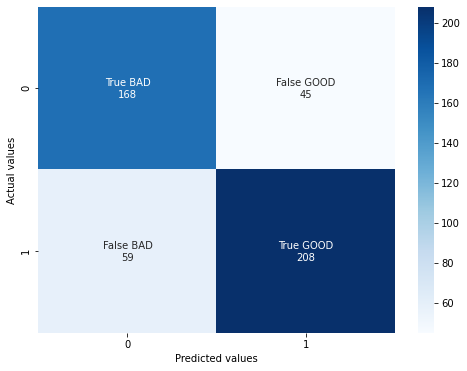

In [ ]:
plot_cm(ensemble_cm)

In [ ]:
all_acc_EHV = cross_val_score(estimator=ensemble, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_EHV.mean())
print('CV_StandardDev: ', all_acc_EHV.std())

CV_accuracy:  0.788231981981982
CV_StandardDev:  0.05212296932023196


We can observe that the results are worse than the one obtained only with Random Forest, so developing an ensembler with the Random Forest and Logistic Regression classifiers is not useful.

### 3.5.2 Soft voting

In [ ]:
ensemble_soft = VotingClassifier(estimators=[('lr', LR), ('rf', RF)], voting='soft')
ensemble_soft.fit(X_train, Y_train)
Y_test_pred = ensemble_soft.predict(X_test)
ensemble_soft_report = classification_report(Y_test,Y_test_pred)
ensemble__soft_cm = confusion_matrix(Y_test,Y_test_pred)
print(ensemble_soft_report)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       213
           1       0.82      0.79      0.80       267

    accuracy                           0.79       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.79      0.79       480



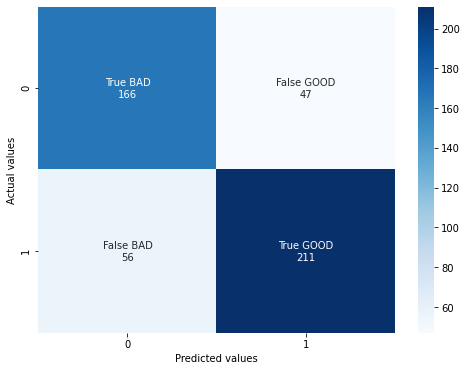

In [ ]:
plot_cm(ensemble__soft_cm)

In [ ]:
all_acc_ESV = cross_val_score(estimator=ensemble_soft, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_ESV.mean())
print('CV_StandardDev: ', all_acc_ESV.std())

CV_accuracy:  0.7819739382239382
CV_StandardDev:  0.0483419050763924


Using the soft voting approach gives similar accuracy but yet lower than the Random Tree classifier alone. Summarizing, the ensemble has a better performance with respect to the individual classifiers except with respect to the Random Forest. This is probably happening because Random Forests give a good performance while the simpler classifiers (SVM and Logistic Regression) make the prediction worse. As we commented previously Random Forests are actually ensembles of many decision trees, so maybe it is not useful to produce an ensemble with the other simpler classifiers.

## 3.6 Boosting

Boosting is a series of techniques that include algorithms that convert weak learners into strong learners through the training of weak learners sequentially, each trying to correct its predecessor [Source](https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5)


#### 2.4.6.1 AdaBoost

From the sklearn webpage, *the core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.* [Source](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)





In [39]:
Ada = AdaBoostClassifier(n_estimators = 300, random_state=42)
Ada.fit(X_train, Y_train)
Y_test_pred = Ada.predict(X_test)
Ada_report = classification_report(Y_test,Y_test_pred)
Ada_cm = confusion_matrix(Y_test,Y_test_pred)
print(Ada_report)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       213
           1       0.78      0.79      0.79       267

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



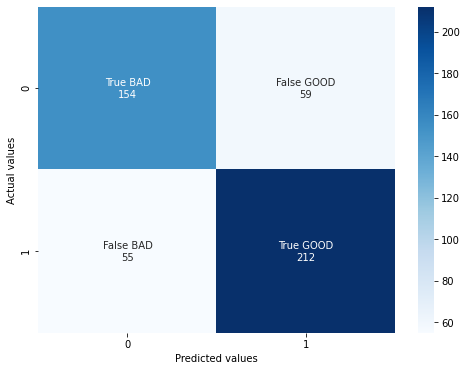

In [40]:
plot_cm(Ada_cm)

In [41]:
all_acc_ADA = cross_val_score(estimator=Ada, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_ADA.mean())
print('CV_StandardDev: ', all_acc_ADA.std())

CV_accuracy:  0.747940797940798
CV_StandardDev:  0.04718119335061149


An interesting plot that we can do with this strategy is observing how the accuracy increases as we increase the number of estimators with this approach, and even this allows us to understand the moment in which the algorithm starts overfitting.

In [43]:
accs = []
for i in range(1,301):  
  Ada = AdaBoostClassifier(n_estimators = i, random_state=42)
  Ada.fit(X_train, Y_train)
  Y_test_pred = Ada.predict(X_test)
  accs.append(accuracy_score(Y_test, Y_test_pred))
print(accs)

[0.6583333333333333, 0.6583333333333333, 0.6833333333333333, 0.7041666666666667, 0.70625, 0.7083333333333334, 0.7, 0.70625, 0.7145833333333333, 0.71875, 0.7354166666666667, 0.7416666666666667, 0.74375, 0.74375, 0.7541666666666667, 0.7375, 0.75, 0.7416666666666667, 0.7354166666666667, 0.73125, 0.7395833333333334, 0.74375, 0.7395833333333334, 0.7458333333333333, 0.74375, 0.7458333333333333, 0.7458333333333333, 0.7541666666666667, 0.7395833333333334, 0.7520833333333333, 0.7375, 0.7375, 0.7395833333333334, 0.7395833333333334, 0.7479166666666667, 0.7458333333333333, 0.7375, 0.73125, 0.7354166666666667, 0.7354166666666667, 0.7354166666666667, 0.7395833333333334, 0.7395833333333334, 0.7354166666666667, 0.7354166666666667, 0.7354166666666667, 0.7375, 0.7375, 0.7333333333333333, 0.7416666666666667, 0.7333333333333333, 0.7375, 0.7395833333333334, 0.74375, 0.7416666666666667, 0.7458333333333333, 0.74375, 0.7375, 0.7375, 0.7375, 0.7416666666666667, 0.7395833333333334, 0.7354166666666667, 0.7375, 0

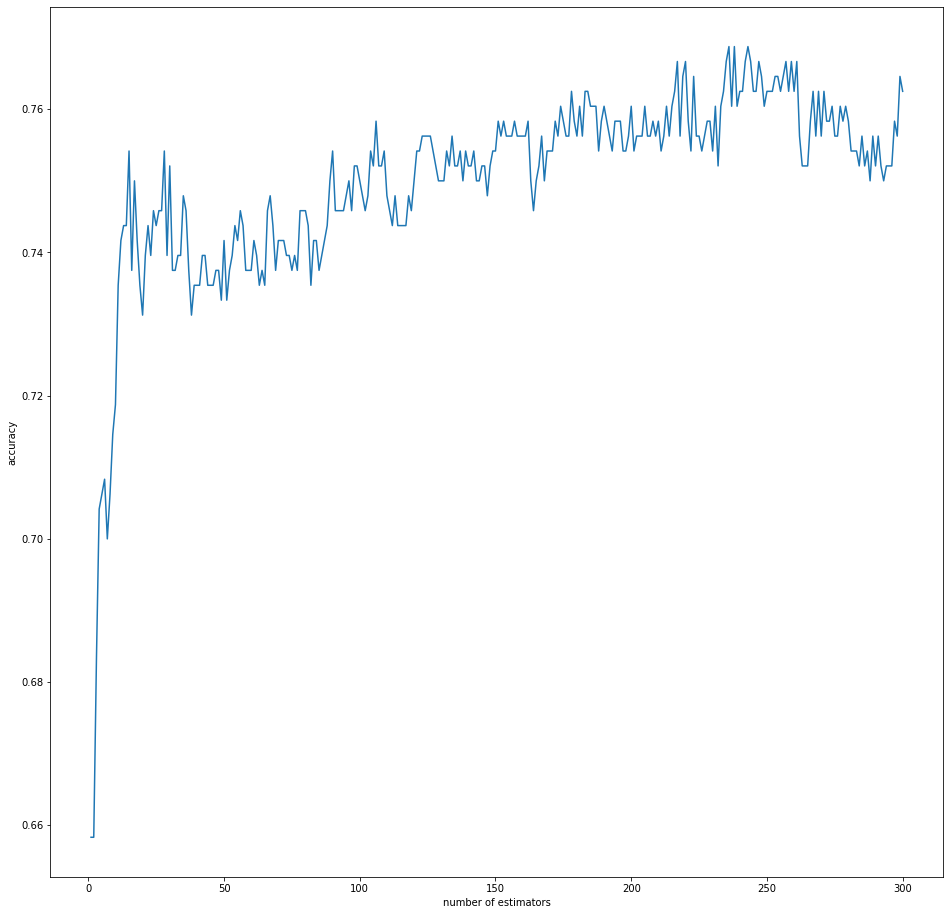

In [47]:
n_estim = range(1,301)
plt.figure(figsize=(16,16))
plt.plot(n_estim, accs)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
pyplot.show()

Seems that we reach the best accuracy around 77 % accuracy, with more or less 240 estimators. This class of plots also show how the boosting methods work. After reaching a 75 % accuracy it is difficult for the boosting to increase its performance.

#### 2.4.6.1 Gradient Tree Boosting

From sklearn documentation, *Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.* [(Source)](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

In [53]:
GBC = GradientBoostingClassifier(n_estimators = 300, random_state=42)
GBC.fit(X_train, Y_train)
Y_test_pred = GBC.predict(X_test)
GBC_report = classification_report(Y_test,Y_test_pred)
GBC_cm = confusion_matrix(Y_test,Y_test_pred)
print(GBC_report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       213
           1       0.82      0.85      0.83       267

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



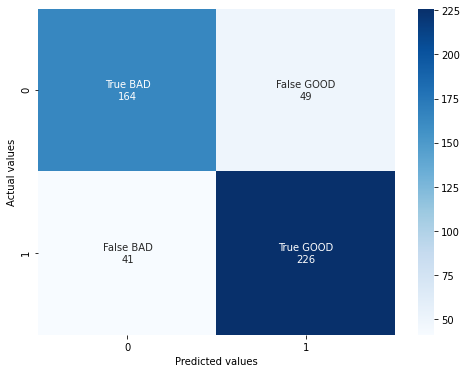

In [ ]:
plot_cm(GBC_cm)

In [ ]:
all_acc_GTB = cross_val_score(estimator=GBC, X=X_train, y=Y_train, cv=10)
print('CV_accuracy: ', all_acc_GTB.mean())
print('CV_StandardDev: ', all_acc_GTB.std())

CV_accuracy:  0.7792953667953668
CV_StandardDev:  0.04611261078966458


We will produce the same plot that we produced with AdaBoost

In [56]:
accs = []
for i in range(1,301):  
  GBC_n = GradientBoostingClassifier(n_estimators = i, random_state=42)
  GBC_n.fit(X_train, Y_train)
  Y_test_pred = GBC_n.predict(X_test)
  accs.append(accuracy_score(Y_test, Y_test_pred))
print(accs)

[0.6958333333333333, 0.6979166666666666, 0.6895833333333333, 0.7020833333333333, 0.7145833333333333, 0.71875, 0.7166666666666667, 0.7208333333333333, 0.7270833333333333, 0.7291666666666666, 0.725, 0.7208333333333333, 0.7270833333333333, 0.7291666666666666, 0.7270833333333333, 0.7291666666666666, 0.7291666666666666, 0.73125, 0.7354166666666667, 0.7354166666666667, 0.7395833333333334, 0.7333333333333333, 0.7333333333333333, 0.7354166666666667, 0.7354166666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.73125, 0.7333333333333333, 0.73125, 0.7333333333333333, 0.7375, 0.7375, 0.7354166666666667, 0.7375, 0.7333333333333333, 0.73125, 0.73125, 0.73125, 0.73125, 0.73125, 0.7333333333333333, 0.7291666666666666, 0.7291666666666666, 0.7375, 0.7333333333333333, 0.7395833333333334, 0.7375, 0.7395833333333334, 0.74375, 0.7395833333333334, 0.7375, 0.7395833333333334, 0.74375, 0.74375, 0.74375, 0.7479166666666667, 0.7479166666666667, 0.7520833333333333, 0.75, 0.75, 0.75, 0.75, 0.7

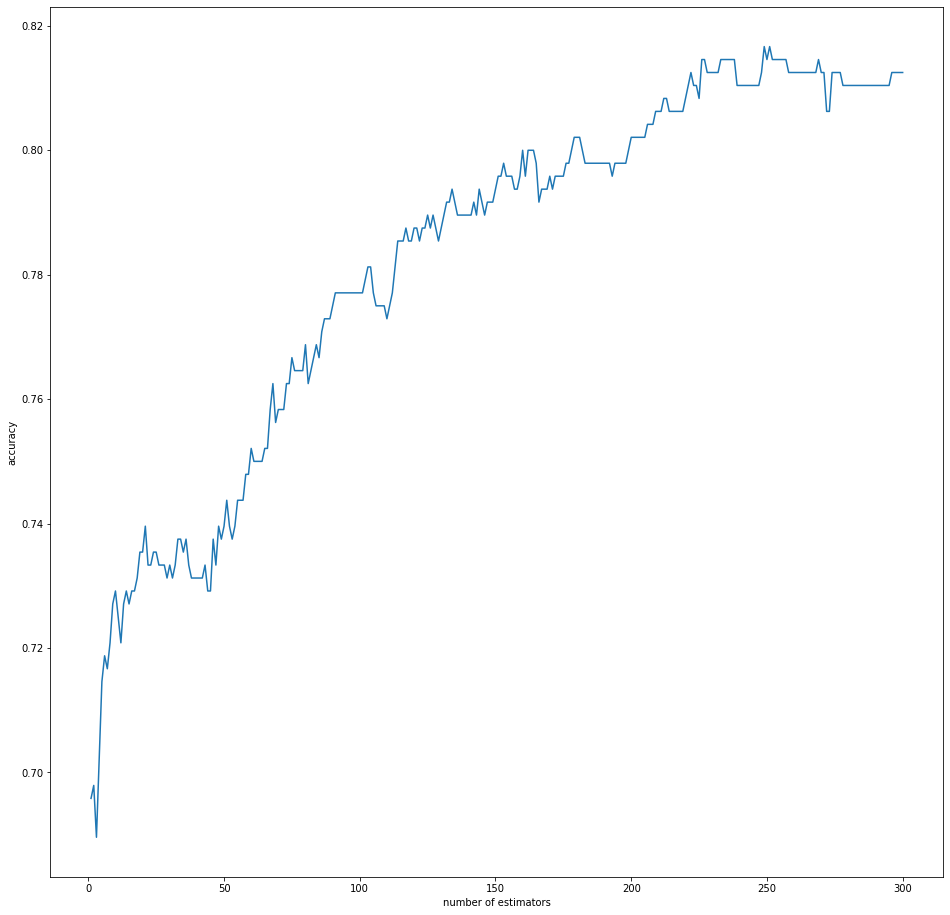

In [57]:
n_estim = range(1,301)
plt.figure(figsize=(16,16))
plt.plot(n_estim, accs)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
pyplot.show()

In this case the classification is much better than AdaBoost and even seems that there is no overfitting yet, although the accuracy curve seems that is starting flattenning. This plot allows to understand that, in general, boosting methods increase their performances as we increase the number of estimators, until we reach a peak in which the overfitting starts.

## 3.7 Neural Networks

**Neural networks** (NN) are computational models slightly based on biological neurons. They are composed of a series of computational units, named **artificial neurons**, that are interconnected. This system takes inputs and generates outputs through a series of computations being produced along the network, transforming a simple input into a desired output thanks to the series of computations that occur within the neurons inside the system. Artificial neural networks are the most popular deep learning methods, specially used for problem such as image recognition. Nevertheless, they can also be used for simpler problems like the one presented in this notebook.

In this case we will use **Keras**, an API used to build, train, evaluate and execute NNs in a simple way and using Python.

For creating our NN we will use the **Sequential** model, that specifies that our model will be created sequentially, meaning that the output of each layer added will be the input of the next layer specified.

In our first NN we will build a very simple network consisting of an input layer, a hidden layer and an output layer. We just need to take into account that the number of neurons in the input layer must be equal to the number of features in our dataset (in our case, **11**) and the number of neurons in the output layer must be equal **1**, because we are performing a binary classification. In the case of the hidden layer the number of neurons is arbitrary, and the best way to choose the perfect number of neurons is a "trial and error" procedure. In our case we will start with **6**.  

Another important step is choosing the **activation functions** for the layers. Given that we are going to perform binary classification, the most appropiate function for the output layer is the **sigmoid function** ([Source](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)). For the hidden layer we are going to use the **Rectified Linear Unit (ReLU)** function, the most popular one for hidden layers.

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(6, input_dim=11, activation='relu', name='HiddenLayer'))
NN_model.add(Dense(1, activation='sigmoid',name='OutputLayer'))

We will show a summary of the model:

In [ ]:
print(NN_model.summary())

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer (Dense)          (None, 6)                 72        
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
None


And we can even plot a representation of the NN using Keras:

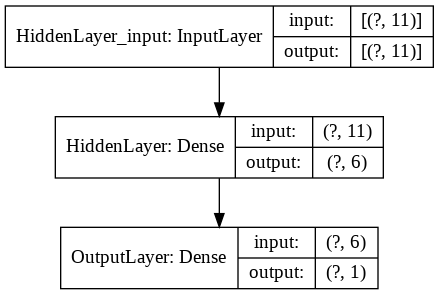

In [ ]:
plot_model(NN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

These representations are very useful to check that the architecture of the NN that you have decided has been correctly coded. We can observe that the architecture is perfect, with one input layer, one hidden layer and one output layer.

Finally we will compile our model. When compiling we need to specifiy the **loss function** of the NN. In the case of binary classification, the recommmended one is **Binary Cross Entropy** ([Source](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)).

In [ ]:
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

And lastly we will train and test the model:

In [ ]:
history = NN_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.9217 - accuracy: 0.4781 - val_loss: 0.8344 - val_accuracy: 0.4875
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.5031 - val_loss: 0.7661 - val_accuracy: 0.5167
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.5451 - val_loss: 0.7121 - val_accuracy: 0.5750
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.5925 - val_loss: 0.6721 - val_accuracy: 0.6167
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6372 - val_loss: 0.6398 - val_accuracy: 0.6521
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6720 - val_loss: 0.6180 - val_accuracy: 0.6500
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7024 - val_loss: 0.6011 - val_accuracy: 0.6750
Epoch 8/100
3

In [ ]:
_, ACC_train = NN_model.evaluate(X_train, Y_train)
_, ACC_test = NN_model.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7375


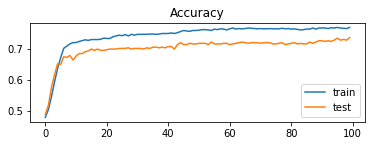

In [ ]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In the plot above we can observe the accuracy obtained with the Testing set along each epoch iteration. The accuracy reached is **73.54 %** for the Testing set

In [ ]:
Y_pred = NN_model.predict(X_test)
Y_pred

array([[0.3925986 ],
       [0.11067146],
       [0.5274242 ],
       [0.31550008],
       [0.72081494],
       [0.2200808 ],
       [0.15541473],
       [0.10129201],
       [0.73758954],
       [0.7706492 ],
       [0.9037334 ],
       [0.27031124],
       [0.6204882 ],
       [0.28548384],
       [0.37313205],
       [0.941177  ],
       [0.27368534],
       [0.47913212],
       [0.95389515],
       [0.39529938],
       [0.12301832],
       [0.27349132],
       [0.74564177],
       [0.9643239 ],
       [0.3603779 ],
       [0.5998745 ],
       [0.8541045 ],
       [0.3020843 ],
       [0.3611797 ],
       [0.73840094],
       [0.2150976 ],
       [0.29215366],
       [0.68521   ],
       [0.13035822],
       [0.5872071 ],
       [0.08826491],
       [0.9283256 ],
       [0.7702292 ],
       [0.54731846],
       [0.86836445],
       [0.30810925],
       [0.28404558],
       [0.87556124],
       [0.260108  ],
       [0.6249782 ],
       [0.7163879 ],
       [0.8982779 ],
       [0.453

In [ ]:
Y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
Y_pred

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,


In [ ]:
NN_report = classification_report(Y_test,Y_pred)
NN_cm = confusion_matrix(Y_test,Y_pred)
print(NN_report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       213
           1       0.78      0.74      0.76       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



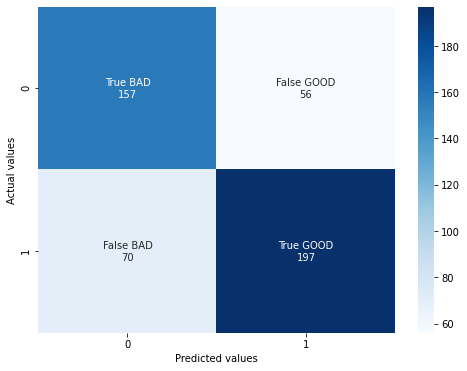

In [ ]:
plot_cm(NN_cm)

We have obtained similar results to the Logistic Regression algorithm (**accuracy** around 74%). Now we are going to try to tune the hyperparameters of the network. The main hyperparameters of neural networks are the number of hidden layers and the number of neurons in each hidden layer.

### 3.7.1 Increasing the number of hidden layers

Now we will produce a neural network with 3 hidden layers instead of one.

In [ ]:
NN_model2 = Sequential()
NN_model2.add(Dense(8, input_dim=11, activation='relu', name='HiddenLayer'))
NN_model2.add(Dense(7, activation='relu', name='HiddenLayer1'))
NN_model2.add(Dense(6, activation='relu', name='HiddenLayer2'))
NN_model2.add(Dense(3, activation='relu', name='HiddenLayer3'))
NN_model2.add(Dense(2, activation='relu', name='HiddenLayer4'))
NN_model2.add(Dense(1, activation='sigmoid',name='OutputLayer'))

In [ ]:
print(NN_model2.summary())

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer (Dense)          (None, 8)                 96        
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 7)                 63        
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 6)                 48        
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 3)                 21        
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 2)                 8         
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 3         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_______________________________________________________

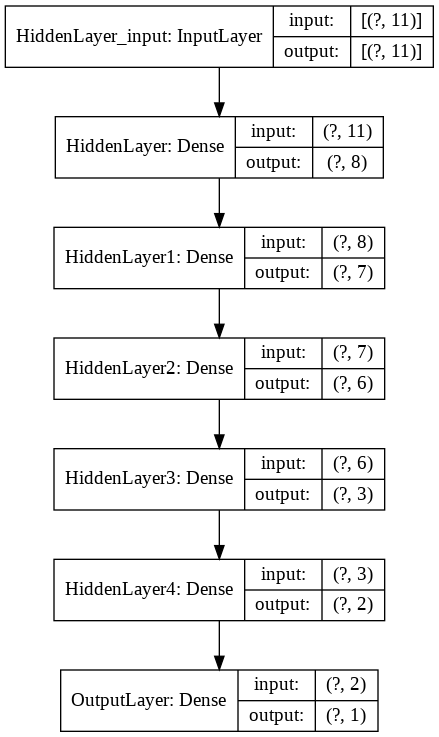

In [ ]:
plot_model(NN_model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
NN_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = NN_model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150)

Epoch 1/150
35/35 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.5130 - val_loss: 0.6950 - val_accuracy: 0.5562
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5255 - val_loss: 0.6906 - val_accuracy: 0.5562
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5255 - val_loss: 0.6896 - val_accuracy: 0.5562
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5255 - val_loss: 0.6885 - val_accuracy: 0.5562
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5255 - val_loss: 0.6826 - val_accuracy: 0.5562
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5255 - val_loss: 0.6651 - val_accuracy: 0.5562
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5255 - val_loss: 0.6474 - val_accuracy: 0.5562
Epoch 8/150
3

In [ ]:
_, ACC_train2 = NN_model2.evaluate(X_train, Y_train)
_, ACC_test2 = NN_model2.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7396


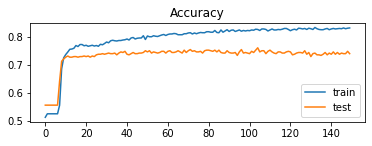

In [ ]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
Y_pred = NN_model2.predict(X_test)
Y_pred

array([[0.4181982 ],
       [0.23966324],
       [0.10972568],
       [0.4139268 ],
       [0.9308492 ],
       [0.23496437],
       [0.04552135],
       [0.05985942],
       [0.938415  ],
       [0.9156085 ],
       [0.9703183 ],
       [0.08858618],
       [0.94181633],
       [0.23444256],
       [0.3176643 ],
       [0.9938605 ],
       [0.07148248],
       [0.4091128 ],
       [0.99324715],
       [0.08258122],
       [0.07372561],
       [0.35958362],
       [0.4820663 ],
       [0.76162004],
       [0.39657205],
       [0.37552866],
       [0.5952302 ],
       [0.19012773],
       [0.41734794],
       [0.990909  ],
       [0.29825044],
       [0.06963265],
       [0.9270972 ],
       [0.2303195 ],
       [0.4198052 ],
       [0.19106603],
       [0.98459566],
       [0.9759407 ],
       [0.23610422],
       [0.9795816 ],
       [0.3350593 ],
       [0.34903893],
       [0.93276346],
       [0.0879873 ],
       [0.7701421 ],
       [0.9814824 ],
       [0.99443114],
       [0.547

In [ ]:
Y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
Y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [ ]:
NN_report = classification_report(Y_test,Y_pred)
NN_cm = confusion_matrix(Y_test,Y_pred)
print(NN_report)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       213
           1       0.81      0.69      0.75       267

    accuracy                           0.74       480
   macro avg       0.74      0.75      0.74       480
weighted avg       0.75      0.74      0.74       480



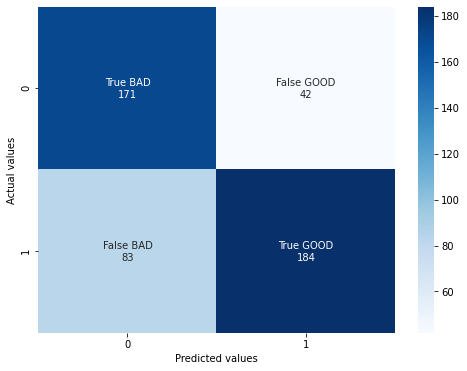

In [ ]:
plot_cm(NN_cm)

The results show lower accuracy with respect to only 1 hidden layer. The confussion matrix shows that the True GOOD cell has decreased its value althought the True BAD classification has decreased its performance. So we can conclude that increasing the number of hidden layers does not increase the accuracy of the method.

### 3.7.2 Maintaining the number of hidden layers, increasing the number of hidden neurons.

Now we will try a different approach, we will continue with only one hidden layer but this time we will increase the number of hidden neurons.

In [ ]:
NN_model3 = Sequential()
NN_model3.add(Dense(8, input_dim=11, activation='relu', name='HiddenLayer'))
NN_model3.add(Dense(1, activation='sigmoid',name='OutputLayer'))

In [ ]:
print(NN_model3.summary())

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer (Dense)          (None, 8)                 96        
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
None


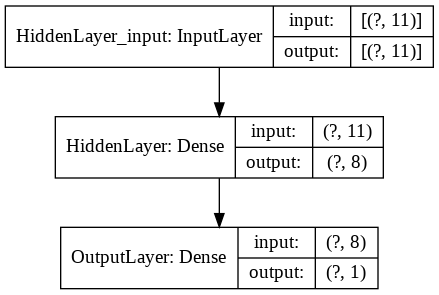

In [ ]:
plot_model(NN_model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
NN_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3 = NN_model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.7845 - accuracy: 0.4745 - val_loss: 0.7764 - val_accuracy: 0.4563
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.5317 - val_loss: 0.7360 - val_accuracy: 0.5333
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5925 - val_loss: 0.7035 - val_accuracy: 0.5938
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6372 - val_loss: 0.6790 - val_accuracy: 0.6313
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6667 - val_loss: 0.6594 - val_accuracy: 0.6458
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6819 - val_loss: 0.6399 - val_accuracy: 0.6750
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6971 - val_loss: 0.6258 - val_accuracy: 0.6833
Epoch 8/100
3

In [ ]:
_, ACC_train3 = NN_model3.evaluate(X_train, Y_train)
_, ACC_test3 = NN_model3.evaluate(X_test, Y_test)

15/15 [==============================] - 0s 965us/step - loss: 0.5197 - accuracy: 0.7396


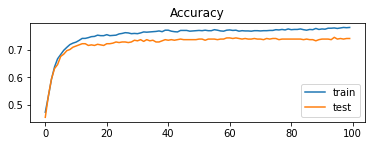

In [ ]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history3.history['accuracy'], label='train')
pyplot.plot(history3.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
Y_pred = NN_model3.predict(X_test)
Y_pred

array([[0.49527526],
       [0.17387602],
       [0.6436997 ],
       [0.2511794 ],
       [0.75527227],
       [0.19941291],
       [0.10137409],
       [0.1326811 ],
       [0.7040726 ],
       [0.82811755],
       [0.8766093 ],
       [0.30567616],
       [0.61319774],
       [0.27273196],
       [0.38281336],
       [0.94486344],
       [0.27949047],
       [0.50815314],
       [0.96507573],
       [0.30766082],
       [0.15040785],
       [0.2701242 ],
       [0.8151662 ],
       [0.9311551 ],
       [0.37137923],
       [0.4865378 ],
       [0.8574528 ],
       [0.38686386],
       [0.2634489 ],
       [0.86172116],
       [0.30723697],
       [0.31372988],
       [0.62941295],
       [0.15984339],
       [0.56731427],
       [0.18325195],
       [0.9481416 ],
       [0.78895867],
       [0.5033346 ],
       [0.8340986 ],
       [0.31085426],
       [0.3451026 ],
       [0.86222994],
       [0.21912962],
       [0.73334825],
       [0.797508  ],
       [0.9500681 ],
       [0.338

In [ ]:
Y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
Y_pred

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,


In [ ]:
NN_report = classification_report(Y_test,Y_pred)
NN_cm = confusion_matrix(Y_test,Y_pred)
print(NN_report)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       213
           1       0.78      0.73      0.76       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



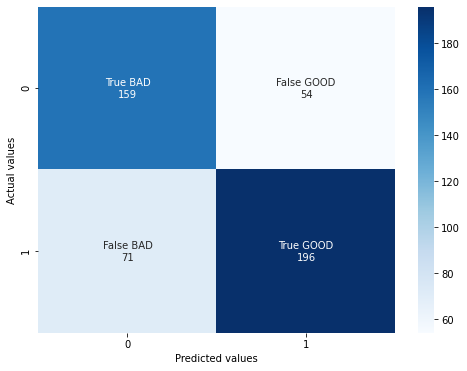

In [ ]:
plot_cm(NN_cm)

The accuracy and confusion matrix is very similar to the first one, showing that just increasing the number of hidden neurons but using only one layer is not enough to improve the model.

With the previous results we can conclude that NNs will get a 74 % accuracy in overall for this specific case, so NNs are not the best methods for this specific problem. Nevertheless not all the possible NNs architectures have been tested (in fact this is impossible because the number of architectures in infinite), so maybe another class of architectures or more complex neural networks could improve the performance.

Nevertheless, given that the problem is simple (it is only a binary classification), the NNs approach is not the most recommended one.

# 4. Results Analysis

In order to summarize the results, we will plot a graphic showing the accuracy obtained in the train and test split of our results (after the tuning of hyperparameteres of each model). The reason for using these metrics instead of the CV ones is because the CV does not include the testing set, only the training set. If we were using CV the results would be not taking into account the testing set. Nevertheless in order to show the variance that may arise we will include the CV results as well.

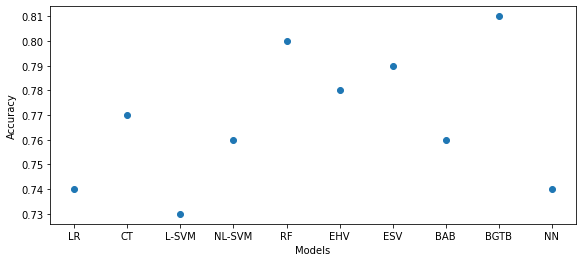

In [ ]:
plt.figure(figsize=(32,4))
models = ["LR","CT","L-SVM","NL-SVM", "RF","EHV","ESV","BAB","BGTB","NN"]
accuracies = [0.74, 0.77,0.73,0.76,0.80,0.78,0.79,0.76,0.81,0.74]
plt.subplot(132)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.scatter(models, accuracies)
plt.show()

where **LR** means Logistic Regression, **CT** classification tree, **L-SVM** means linear SVM, **NL-SVM** means non-linear SVM, **RF** means Random Forests, **EHV** means Hard-voting ensemble, **ESV** means Soft-voting ensemble, **BAB** means AdaBoost, **BGTB** means Gradient Tree Boosting, and **NN** means Neural Networks 

From the plot we can derive that the best accuracies have been obtained using **BGTB** and **RF**. This is due to the properties of the methods: while Boosting allows to iteratively correct mistakes done during a classification procedure, Random Forests combine the power of many "experts" judging the classification. Random Forests allow a very deep classification as well, because they can go as deep as we want, while other approaches are not able to do that. Actually, the problem of outliers specified in the Data Preparation section can be overcome by Random Forests in a better way than other approaches. On the other hand Boosting methods are usually a winning strategy because of their power.
Summarizing, the best performances are obtained using RFs and BGTB

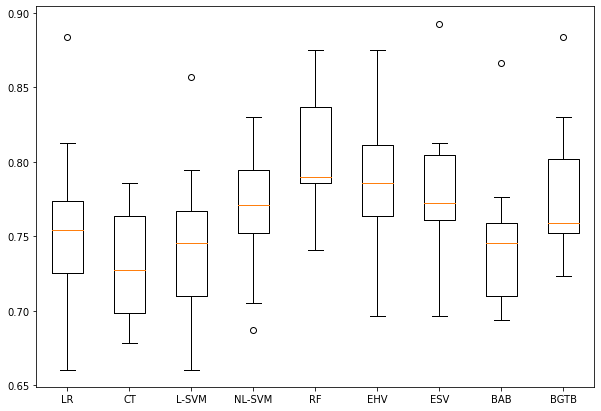

In [ ]:
models = ["LR","CT","L-SVM","NL-SVM", "RF","EHV","ESV","BAB","BGTB"]
accuracies = [all_acc_LR,all_acc_DT,all_acc_LSVM,all_acc_NLSVM,all_acc_RF,all_acc_EHV,all_acc_ESV,all_acc_ADA,all_acc_GTB]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(models) 
plt.boxplot(accuracies)
plt.show()


The Cross Validation plot show very similar results as the one with the train and test split. Here the BGTB algorithm show a worse performance although one of its outliers show a high accuracy. Nevertheless the main conclusion that RF is one of the best models is still conserved.

# 5. Conclusions

The binary classification problem of the Red Wine dataset has been solved throught different approaches. Nevertheless the best methods have been Boosting and Random Forets, due to the power of the first one and the Ensemble approach of the second one. The final accuracy is of **80-81%** for these specific methods, meaning that we would be able to predict 8 out of 10 wines correctly. Actually this result is good taking into account the difficulty of translating sensory features into mathematical approaches (as many variables can be involved in the assignation of a mark to a wine, and is not as "predictable" as other machine learning problems or features). The fact that wine experts base their opinion in the smell and flavour, without taking into account the chemical properties, can derive in not taking into account all the chemical properties that influence into the flavour (I am quite sure that nowadays we do not know all the chemistry that produces the taste and smell). Another problem of the dataset is the big number of outliers that exist in features, making the classification difficult even after standardization.

Other approaches can be taken for this dataset, like a **multi-classification process**, classificating wines into "BAD", "ACCEPTABLE" or "GOOD". Actually this was one of my first approaches. Nevertheless after observing the dataset I realized that this approach cannot be taken with this dataset due to the **class imbalance**. There are almost no samples of bad and excellent wines in the dataset, almost all of them correspond to 5-6 marks. Even using oversampling and undersampling techniques the imbalance is very huge and results were not promising. Therefore this approach could be taken increasing the number of samples in order to balance the dataset, although this is a limiting problem in many machine learning approaches because it is the process that most time and money require.

Even regression approaches could be taken, although in my opinion it is not recommended at all because there are only discrete values for the classes, so it would not make sense at all. A multi-class classification with values 3,4,5,6,7,8 would be better, although here we would have again the problem of class imbalance, even bigger, and the number of samples required to overcome the problem would be too huge.